### **Carbon Emission Prediction on the World Bank Dataset for Canada**

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,172.158729,210.819017,194.917536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,1.033908,1.052204,1.079727,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123409,0.115142,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,0.193676,0.189305,0.143989,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,0.268937,0.172096,0.289702,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,0.017023,0.017380,0.021384,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
263,South Africa,5.727223,5.832621,5.887168,5.961337,6.332343,6.616545,6.453858,6.560824,6.593620,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
264,Zambia,NaN,NaN,NaN,NaN,0.946606,1.096875,0.951122,1.261960,1.166853,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


In [ ]:
df_canada = df[df['Country Name'] == 'Canada']
df_canada = df_canada.drop('Country Name',axis =1)

Year = df_canada.columns

In [ ]:
canada_df = df_canada.T

In [ ]:
canada_df.head()

,35
1960,10.770847
1961,10.627898
1962,11.130627
1963,11.132102
1964,12.305370


In [ ]:
columns = ['Emission']
canada_df.columns = columns

In [ ]:
canada_df.head()

,Emission
1960,10.770847
1961,10.627898
1962,11.130627
1963,11.132102
1964,12.305370


In [ ]:
canada_df.reset_index(inplace=True)
canada_df = canada_df.rename(columns = {'index':'Year'})
canada_df.head()

,Year,Emission
0,1960,10.770847
1,1961,10.627898
2,1962,11.130627
3,1963,11.132102
4,1964,12.305370


In [ ]:
# canada_df.isna()
canada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      59 non-null     object 
 1   Emission  59 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [ ]:
X = canada_df.Year
y = canada_df.Emission

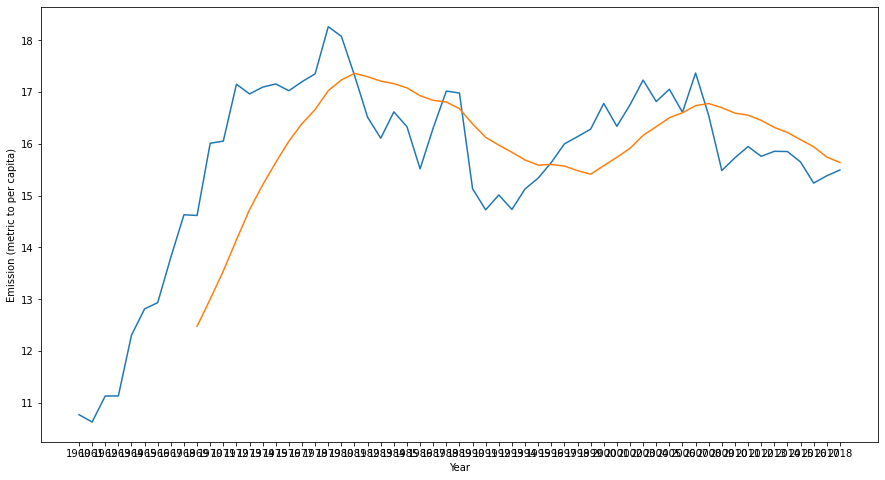

In [ ]:
plt.rcParams['figure.figsize'] = 15,8
plt.plot(X, y)
plt.plot(y.rolling(10).mean())
plt.xlabel('Year')
plt.ylabel('Emission (metric to per capita)')
plt.show()

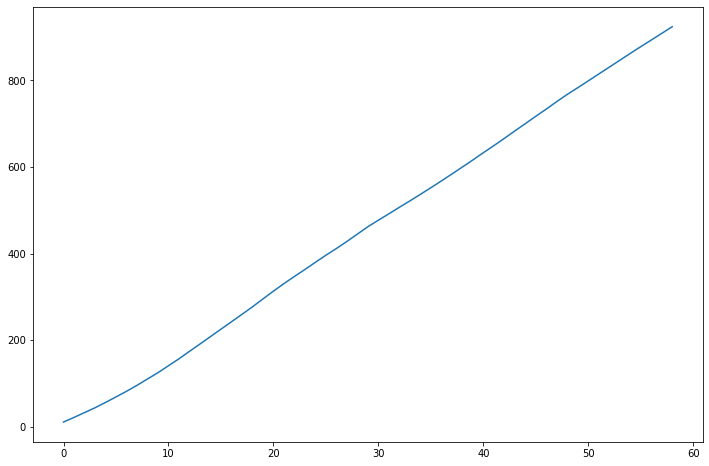

In [ ]:
cumulative = np.cumsum(y)
plt.plot(cumulative)

In [ ]:
y.rolling(10).mean()

In [ ]:
X = np.array(X, dtype = 'int32')
X = X.reshape(-1,1)
X.shape

(59, 1)

In [ ]:
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(59, 1)

# Prediction Using Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.1)

In [ ]:
X_train.shape

(53, 1)

In [ ]:
y_train.shape

(53, 1)

In [ ]:
LinearReg = LinearRegression()
DSTReg = DecisionTreeRegressor(random_state=0)
RFReg = RandomForestRegressor(n_estimators=500, random_state=0)
SVMReg = SVR(kernel='rbf')

LinearReg.fit(X_train,y_train)
DSTReg.fit(X_train,y_train)
RFReg.fit(X_train,y_train)
SVMReg.fit(X_train,y_train)

SVR()

In [ ]:
linear_y =LinearReg.predict(X_test).reshape(-1, 1)
DST_y = DSTReg.predict(X_test).reshape(-1,1)
RF_y = RFReg.predict(X_test).reshape(-1,1)
SVM_y = SVMReg.predict(X_test).reshape(-1,1)

In [ ]:
def accuracy(predicted, actual):
  diff = actual - predicted
  accurate_pred = 0
  for x in diff:
    if -1<x<1:
      accurate_pred +=1
  accuracy = accurate_pred/len(actual)

  return accuracy

In [ ]:
linear_acc = accuracy(linear_y,y_test)
DST_acc = accuracy(DST_y, y_test)
RF_acc = accuracy(RF_y, y_test)
SVM_acc = accuracy(SVM_y, y_test)

In [ ]:
print(RF_acc)

1.0


In [ ]:
a = [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
df=pd.DataFrame(a, columns=['Year'])
df

,Year
0,2019
1,2020
2,2021
3,2022
4,2023
5,2024
6,2025
7,2026
8,2027
9,2028


In [ ]:
LinearRegression= LinearReg.predict(df)
DecisionTree = DSTReg.predict(df)
RandomForest=RFReg.predict(df)
SVM = SVMReg.predict(df)

In [ ]:
df['LinearRegression'] = LinearRegression
df['Decision Tree'] = DecisionTree
df['Random Forest'] = RandomForest
df['SVM'] = SVM

In [ ]:
df.columns

Index(['Year', 'LinearRegression', 'Decision Tree', 'Random Forest', 'SVM'], dtype='object')

In [ ]:
print(df)

    Year  LinearRegression  Decision Tree  Random Forest        SVM
0   2019         16.861335      15.497025      15.458702  15.222985
1   2020         16.901448      15.497025      15.458702  15.124959
2   2021         16.941560      15.497025      15.458702  15.038435
3   2022         16.981673      15.497025      15.458702  14.963969
4   2023         17.021786      15.497025      15.458702  14.901656
5   2024         17.061899      15.497025      15.458702  14.851187
6   2025         17.102012      15.497025      15.458702  14.811917
7   2026         17.142124      15.497025      15.458702  14.782936
8   2027         17.182237      15.497025      15.458702  14.763147
9   2028         17.222350      15.497025      15.458702  14.751336
10  2029         17.262463      15.497025      15.458702  14.746237
11  2030         17.302576      15.497025      15.458702  14.746592


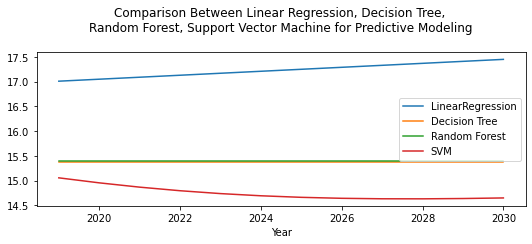

In [ ]:
df.plot.line(x="Year", title="Comparison Between Linear Regression, Decision Tree, \nRandom Forest, Support Vector Machine for Predictive Modeling\n")

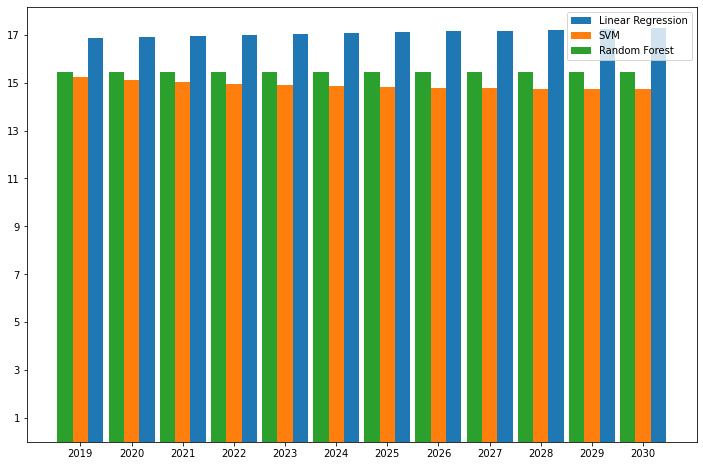

In [ ]:
plt.rcParams['figure.figsize'] = 12,8

xpos = np.arange(len(df.Year))

plt.yticks(list(range(1, 30, 2)))
plt.xticks(xpos, df.Year)
plt.bar(xpos+0.3, df['LinearRegression'], label='Linear Regression', width=0.3)
plt.bar(xpos, df['SVM'], label='SVM', width=0.3)
plt.bar(xpos-0.3, df['Random Forest'], label='Random Forest', width=0.3)
plt.legend()

In [ ]:
cumulative = np.cumsum(df.iloc[:, 1:])

In [ ]:
import seaborn as sns

Text(0, 0.5, 'Total CO2 Emission')

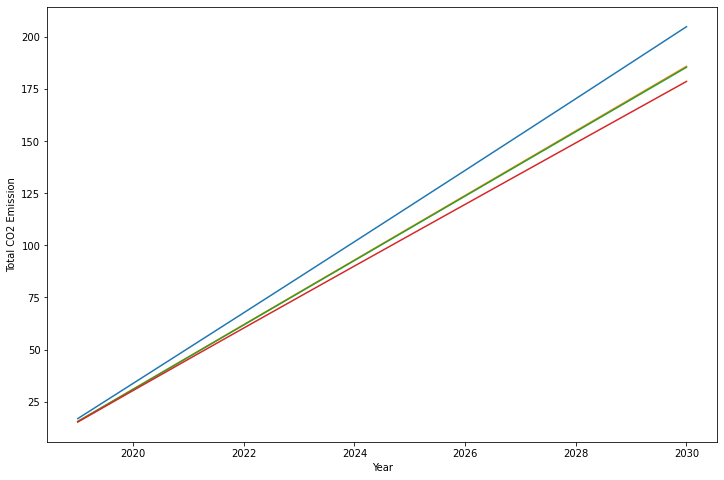

In [ ]:
plt.plot(df.Year, cumulative)
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission')